# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# with this line we make sure that any plot appears within the jupyter notebook file, not on a seperate window
%matplotlib inline

# Loading data

In [3]:
file_name = 'amz_uk_price_prediction_dataset.csv'

In [5]:
df = pd.read_csv(file_name)

# Part 1: Understanding Product Categories

In [36]:
'''
df.shape # (2443651, 9)
df.columns # ['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'category']
df.duplicated().any()
'''
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


#### Frequency Tables

In [32]:
# Generate a frequency table for the product category.
category_counts = df["category"].value_counts().reset_index()
category_counts

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


In [35]:
# Which are the top 5 most listed product categories?
category_counts.head(5)["category"].tolist()

['Sports & Outdoors',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Bath & Body',
 'Birthday Gifts']

#### Visualizations

In [ ]:
# Display the distribution of products across different categories using a bar chart.

In [64]:
# sns.barplot(x=category_counts["category"], y=category_counts["count"], palette="Set3");
# df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
# df["category"].nunique() # 296

In [50]:
# Because there are too many categories and the plots become very buysy I will make a plot for the top 20 categories
category_counts_filtered = category_counts.head(20)

<Axes: xlabel='count', ylabel='category'>

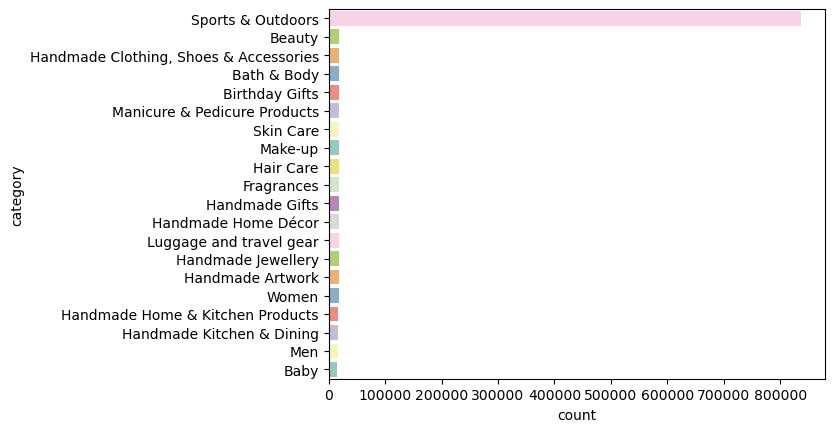

In [48]:
sns.barplot(y=category_counts_filtered["category"], x=category_counts_filtered["count"], 
            hue=category_counts_filtered["count"], legend=False, palette="Set3")

In [63]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [ ]:
# because there are so many categories, for the pie chart, I am gonna show the top 10, and the rest will be shown within "others"

In [66]:
'''
fig, ax = plt.subplots()
ax.pie(category_counts_filtered['count'], labels=category_counts_filtered['category'], autopct='%1.1f%%')
plt.show()
'''

"\nfig, ax = plt.subplots()\nax.pie(category_counts_filtered['count'], labels=category_counts_filtered['category'], autopct='%1.1f%%')\nplt.show()\n"

In [69]:
list_top_10 = category_counts.head(10)["category"].tolist()
df["category_with_Other"] = [x if x in list_top_10 else "Other" for x in df["category"]]

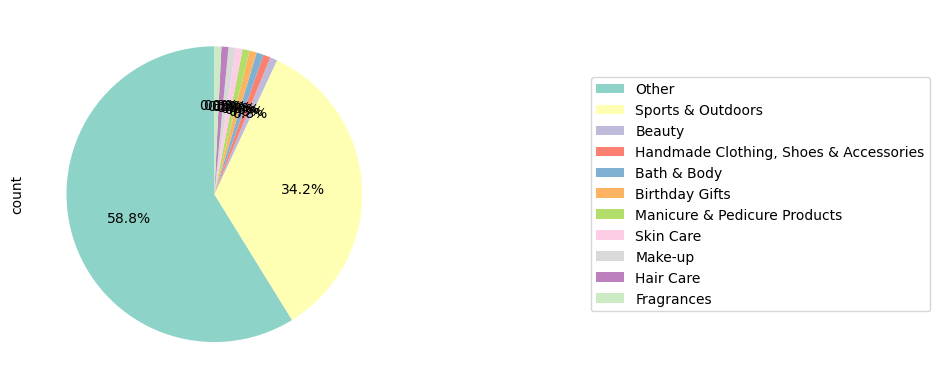

In [87]:
df["category_with_Other"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), 
                                                  labels = None)
plt.legend(df["category_with_Other"].value_counts().index, loc="center left", bbox_to_anchor=(1.5, 0.5))
plt.show()

#ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       #pctdistance=1.25, labeldistance=.6)

# Part 2: Delving into Product Pricing

#### Measures of Centrality:

In [ ]:
# Calculate the mean, median, and mode for the price of products.

In [86]:
print(df["price"].mean().round(4))
print(df["price"].median())
print(df["price"].mode()[0])

89.2438
19.09
9.99


In [ ]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

The average price point is 89.24, but the most common is much lower, at 9.99. It seems there are some prices that are quite high and are influencing the average price, creating a right-skewed distribution of prices. 

#### Measures of Dispersion

In [88]:
print(df["price"].var())
print(df["price"].std())
print(df["price"].max() - df["price"].min()) # range
print(df["price"].quantile(0.75) - df["price"].quantile(0.25)) # IQR

119445.48532254907
345.60886175349884
100000.0
36.0


In [ ]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?

The variance is very high, and we can see also the range of the price being very high as well. At the same time we observe that the interquartile range value quite low, which again indicates that there are probably outliers that drive up the variation and range.

#### Visualizations:

In [ ]:
# Is there a specific price range where most products fall? 
# Plot a histogram to visualize the distribution of product prices. 

<Axes: xlabel='price', ylabel='Count'>

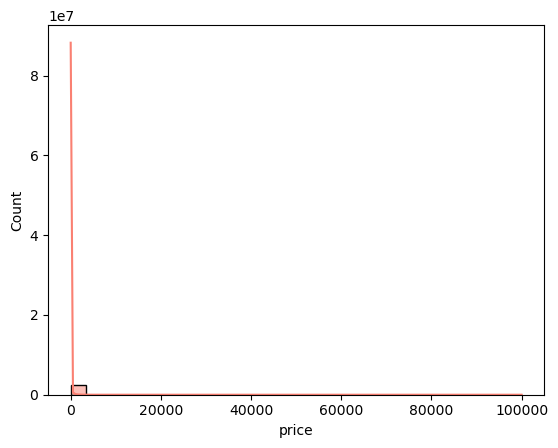

In [89]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

In [92]:
df["price"].sort_values(ascending=False).head(40)

2008013    100000.00
1987238     77752.00
1905315     24674.59
1408966     23482.73
319555      22933.42
1490285     21999.00
1490286     21999.00
1907272     21464.82
1907271     21464.82
1907273     21464.82
1430208     20489.75
1758235     20216.00
1430241     20015.45
1490280     19999.00
1490269     19999.00
1490231     19999.00
1490272     19999.00
367848      19990.00
589336      19290.93
1408974     19211.51
322759      18244.80
2392759     18169.83
2393389     18144.00
2392228     17837.54
2393205     17611.51
1416210     17139.30
1490252     16999.00
1757094     16367.43
2393494     16113.99
864567      16000.00
804934      16000.00
1490257     15999.00
1430217     15991.55
1430381     15952.79
1429899     15767.15
1758932     15736.30
2243389     15654.93
2392704     15636.29
1430243     14852.21
2242020     14611.22
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

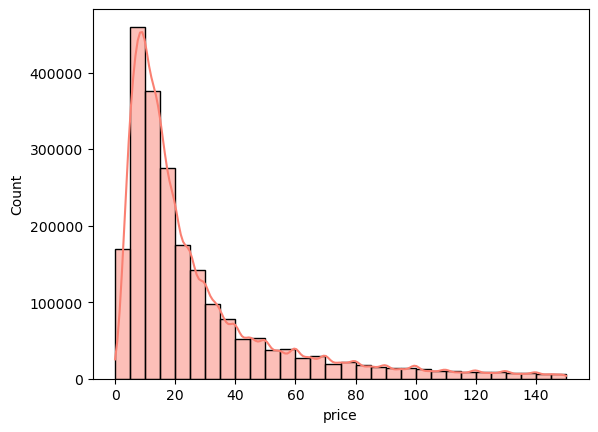

In [100]:
df_75_quantile = df[df["price"] < df["price"].quantile(0.9)]
sns.histplot(df_75_quantile["price"], kde=True, bins=30, color="salmon")

The histogram is difficult to read because of the outliers in the values. A way to solve this is by adjusting the histogram to represent the 90th percentile of the data offers a clearer visualization by excluding outliers, ensuring focus on the majority of product prices. 

In [ ]:
# Are there products that are priced significantly higher than the rest?

Yes, the dataset has outliers.

<Axes: ylabel='price'>

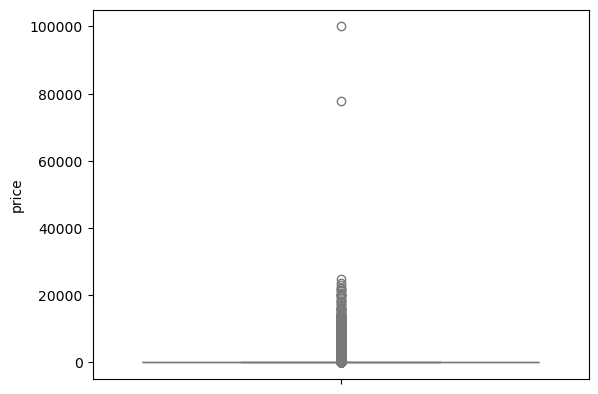

In [101]:
sns.boxplot(data = df['price'], color="lightblue")

# Part 3: Unpacking Product Ratings

#### Measures of Centrality

In [ ]:
# Calculate the mean, median, and mode for the rating of products.

In [105]:
print(df["stars"].mean().round(4))
print(df["stars"].median())
print(df["stars"].mode()[0])

2.1528
0.0
0.0


In [106]:
# df["stars"].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [107]:
df["stars"].value_counts(normalize=True)

stars
0.0    0.501561
4.5    0.062029
4.6    0.056062
4.4    0.055722
5.0    0.052582
4.3    0.046064
4.7    0.038699
4.2    0.035550
4.0    0.027045
4.1    0.026647
4.8    0.017129
3.9    0.014959
3.8    0.011408
3.7    0.008650
3.6    0.006637
3.5    0.006005
3.0    0.005246
4.9    0.004535
3.4    0.004238
1.0    0.003472
3.3    0.003384
3.2    0.002362
3.1    0.001915
2.0    0.001596
2.9    0.001367
2.8    0.000944
2.7    0.000861
2.5    0.000861
2.6    0.000646
2.4    0.000434
2.3    0.000300
2.2    0.000246
2.1    0.000221
1.5    0.000165
1.9    0.000123
1.8    0.000102
1.7    0.000072
1.4    0.000061
1.6    0.000060
1.3    0.000032
1.2    0.000009
1.1    0.000001
Name: proportion, dtype: float64

A significant portion of products lack customer reviews, with at least half of them displaying a rating of 0. While some may be newly introduced items yet to receive feedback, the prevalence of zero ratings suggests that a considerable number of customers refrain from rating products altogether.

#### Measures of Dispersion

In [108]:
# Determine the variance, standard deviation, and interquartile range for product rating.

In [110]:
print(df["stars"].var().round(4))
print(df["stars"].std().round(4))
print(df["stars"].quantile(0.75) - df["stars"].quantile(0.25)) # IQR

4.8174
2.1949
4.4


In [112]:
print(df["stars"].max() - df["stars"].min()) # range

5.0


The variance and standard deviation might seem low, but that is because the ratings only range from 0 to 5. However, when we look to the interquartile range for the ratings, which goes up to 4.4, we see a wider spread of opinions among customers. This suggests that there is a wide variation in customer feedback.

#### Shape of distribution

In [ ]:
# Calculate the skewness and kurtosis for the rating column.

In [115]:
print(df["stars"].skew())
print(df["stars"].kurtosis())

0.08120735761080985
-1.9260061280432985


The ratings exhibit a relatively symmetrical distribution, as indicated by the skewness value of 0.08. Furthermore, the kurtosis value of -1.92 indicates a less pronounced peak and fewer outliers in the rating distribution.

#### Visualizations

<Axes: xlabel='stars', ylabel='Count'>

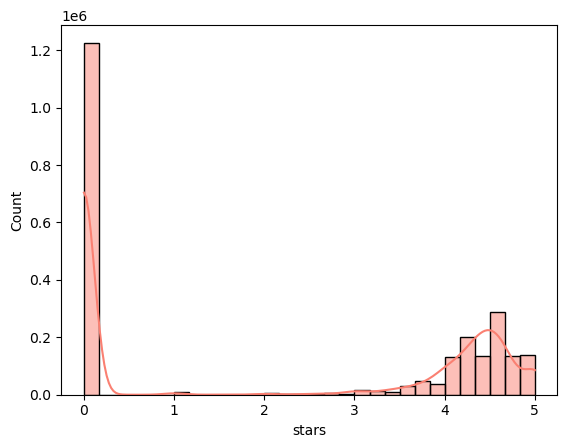

In [116]:
sns.histplot(df["stars"], kde=True, bins=30, color="salmon")

<Axes: xlabel='stars', ylabel='Count'>

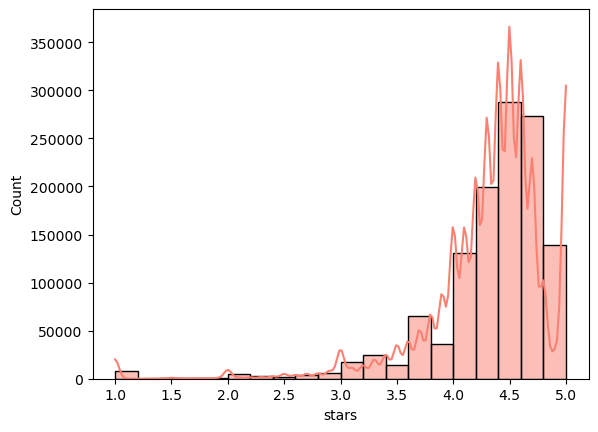

In [124]:
sns.histplot(df[df["stars"] != 0]["stars"], kde=True, bins=20, color="salmon")

After excluding null values (those equal to 0) from the ratings for clearer visualization, it's evident that the majority of ratings fall above 4. It appears that a rating of around 4.5 is the most commonly awarded score.